<a href="https://colab.research.google.com/github/Rohit-Rannavre/Data-Science-2022/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist

### **Loading Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) =  fashion_mnist.load_data()

### **Checking the shape of the data**

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### **Changing the dimentions of data**

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### **Feature scaling**

In [ ]:
X_train = X_train/255
X_test = X_test/255

### **Splitting the dataset**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20)

In [ ]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

### **Building a CNN**

In [ ]:
model = Sequential([
                    # 1st convo layer
                    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = [28, 28, 1]),
                    MaxPooling2D(pool_size = (2,2)),
                    
                    # 2nd convo layer
                    Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
                    MaxPooling2D(pool_size = (2,2)),

                    # fattening
                    Flatten(),

                    # fully-connected layers
                    Dense(units = 128, activation='relu'),  # input
                    Dense(units = 48, activation='relu'),  # hidden-1
                    Dense(units = 24, activation='relu'),  # hidden-2
                    Dense(units = 10, activation='softmax')  # output
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, batch_size = 512, verbose=1)

Epoch 1/10
94/94 [==============================] - 6s 22ms/step - loss: 1.2441 - accuracy: 0.5575 - val_loss: 0.6315 - val_accuracy: 0.7649
Epoch 2/10
94/94 [==============================] - 1s 14ms/step - loss: 0.5699 - accuracy: 0.7869 - val_loss: 0.5288 - val_accuracy: 0.7996
Epoch 3/10
94/94 [==============================] - 1s 13ms/step - loss: 0.4918 - accuracy: 0.8211 - val_loss: 0.4930 - val_accuracy: 0.8148
Epoch 4/10
94/94 [==============================] - 1s 15ms/step - loss: 0.4587 - accuracy: 0.8335 - val_loss: 0.4351 - val_accuracy: 0.8414
Epoch 5/10
94/94 [==============================] - 1s 16ms/step - loss: 0.4254 - accuracy: 0.8462 - val_loss: 0.4136 - val_accuracy: 0.8501
Epoch 6/10
94/94 [==============================] - 1s 14ms/step - loss: 0.4030 - accuracy: 0.8530 - val_loss: 0.3973 - val_accuracy: 0.8553
Epoch 7/10
94/94 [==============================] - 1s 15ms/step - loss: 0.3833 - accuracy: 0.8604 - val_loss: 0.3838 - val_accuracy: 0.8593
Epoch 8/10
94

### **Testing the model**

In [ ]:
predicted = np.argmax(model.predict(np.expand_dims(a = X_test[0], axis = 0)).round(2))
actual = y_test[0]

print('Predicted: ', predicted)
print('Actual: ', actual)

Predicted:  9
Actual:  9


### **Evaluating the model**

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3766 - accuracy: 0.8621


[0.37656262516975403, 0.8621000051498413]

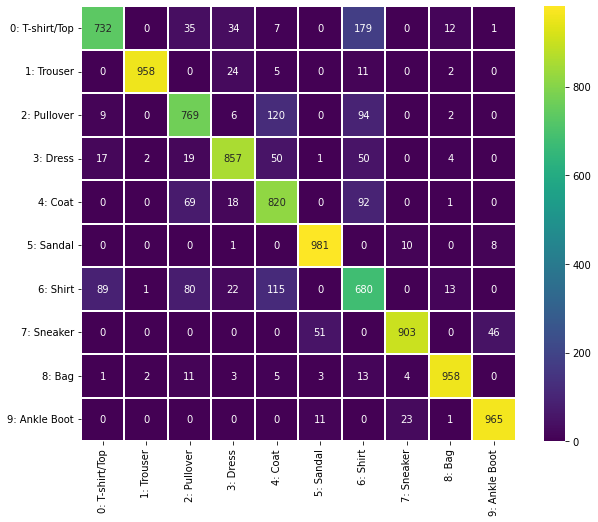

In [ ]:
# confusion matrix

class_labels = ['0: T-shirt/Top', '1: Trouser', '2: Pullover', '3: Dress', '4: Coat', 
                '5: Sandal', '6: Shirt', '7: Sneaker', '8: Bag', '9: Ankle Boot']

y_pred = model.predict(X_test).round(2)
y_pred_labels = [np.argmax(label) for label in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt='d', square = True, linewidth=1, cmap='viridis', xticklabels = class_labels, yticklabels= class_labels);

In [ ]:
# classification report
class_report = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(class_report) 

                precision    recall  f1-score   support

0: T-shirt/Top       0.86      0.73      0.79      1000
    1: Trouser       0.99      0.96      0.98      1000
   2: Pullover       0.78      0.77      0.78      1000
      3: Dress       0.89      0.86      0.87      1000
       4: Coat       0.73      0.82      0.77      1000
     5: Sandal       0.94      0.98      0.96      1000
      6: Shirt       0.61      0.68      0.64      1000
    7: Sneaker       0.96      0.90      0.93      1000
        8: Bag       0.96      0.96      0.96      1000
 9: Ankle Boot       0.95      0.96      0.96      1000

      accuracy                           0.86     10000
     macro avg       0.87      0.86      0.86     10000
  weighted avg       0.87      0.86      0.86     10000



In [ ]:
model.save('CNN_fashion_mnist.h5')

In [ ]:
from keras.models import load_model
data = load_model('CNN_fashion_mnist.h5')
np.argmax(data.predict(np.expand_dims(a = X_test[0], axis = 0).round(2)))

9

In [ ]:
y_test[0]

9